# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Get the data

In [11]:
import os

# pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data\test'.
There are 0 directories and 250 images in 'data\test\pizza'.
There are 0 directories and 250 images in 'data\test\steak'.
There are 2 directories and 0 images in 'data\train'.
There are 0 directories and 750 images in 'data\train\pizza'.
There are 0 directories and 750 images in 'data\train\steak'.


In [12]:
# Check the number of images in each directory
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"{dirpath} contains {len(filenames)} images.")

data contains 1 images.
data\test contains 0 images.
data\test\pizza contains 250 images.
data\test\steak contains 250 images.
data\train contains 0 images.
data\train\pizza contains 750 images.
data\train\steak contains 750 images.


In [13]:
# Get the classs names
import pathlib
import numpy as np
data_dir = pathlib.Path("data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [14]:
# Visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class

    # Get a random image path
    random_img = random.sample(os.listdir(target_folder), 1)

    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (383, 512, 3)


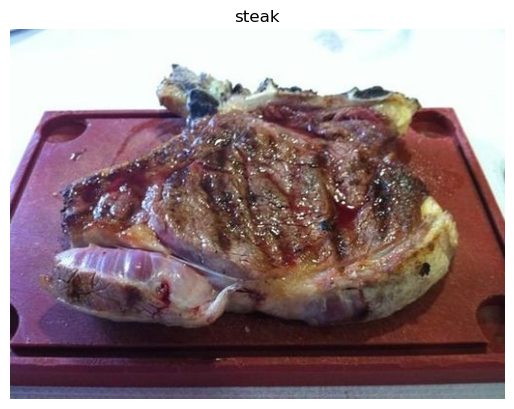

In [15]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/train/", target_class="steak")

In [16]:
# View the img
img

array([[[197, 225, 255],
        [189, 217, 254],
        [176, 204, 244],
        ...,
        [234, 250, 249],
        [231, 250, 248],
        [230, 249, 247]],

       [[152, 180, 219],
        [142, 172, 210],
        [128, 156, 196],
        ...,
        [234, 250, 249],
        [231, 250, 248],
        [231, 250, 248]],

       [[ 92, 121, 161],
        [ 85, 117, 156],
        [ 81, 110, 150],
        ...,
        [236, 252, 251],
        [235, 251, 250],
        [234, 250, 249]],

       ...,

       [[ 92,  98, 134],
        [ 93,  99, 135],
        [ 94, 100, 136],
        ...,
        [116, 138, 135],
        [114, 136, 133],
        [111, 133, 130]],

       [[ 93,  98, 136],
        [ 91,  99, 135],
        [ 94,  99, 137],
        ...,
        [118, 140, 137],
        [117, 139, 136],
        [112, 137, 133]],

       [[ 98, 106, 145],
        [ 96, 106, 142],
        [ 98, 106, 145],
        ...,
        [114, 139, 135],
        [112, 137, 133],
        [109, 136, 131]]

In [17]:
# Check the shape of the image
img.shape

(383, 512, 3)

In [18]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(383, 512, 3), dtype=uint8, numpy=
array([[[197, 225, 255],
        [189, 217, 254],
        [176, 204, 244],
        ...,
        [234, 250, 249],
        [231, 250, 248],
        [230, 249, 247]],

       [[152, 180, 219],
        [142, 172, 210],
        [128, 156, 196],
        ...,
        [234, 250, 249],
        [231, 250, 248],
        [231, 250, 248]],

       [[ 92, 121, 161],
        [ 85, 117, 156],
        [ 81, 110, 150],
        ...,
        [236, 252, 251],
        [235, 251, 250],
        [234, 250, 249]],

       ...,

       [[ 92,  98, 134],
        [ 93,  99, 135],
        [ 94, 100, 136],
        ...,
        [116, 138, 135],
        [114, 136, 133],
        [111, 133, 130]],

       [[ 93,  98, 136],
        [ 91,  99, 135],
        [ 94,  99, 137],
        ...,
        [118, 140, 137],
        [117, 139, 136],
        [112, 137, 133]],

       [[ 98, 106, 145],
        [ 96, 106, 142],
        [ 98, 106, 145],
        ...,
        [114, 139, 13

In [19]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.77254902, 0.88235294, 1.        ],
        [0.74117647, 0.85098039, 0.99607843],
        [0.69019608, 0.8       , 0.95686275],
        ...,
        [0.91764706, 0.98039216, 0.97647059],
        [0.90588235, 0.98039216, 0.97254902],
        [0.90196078, 0.97647059, 0.96862745]],

       [[0.59607843, 0.70588235, 0.85882353],
        [0.55686275, 0.6745098 , 0.82352941],
        [0.50196078, 0.61176471, 0.76862745],
        ...,
        [0.91764706, 0.98039216, 0.97647059],
        [0.90588235, 0.98039216, 0.97254902],
        [0.90588235, 0.98039216, 0.97254902]],

       [[0.36078431, 0.4745098 , 0.63137255],
        [0.33333333, 0.45882353, 0.61176471],
        [0.31764706, 0.43137255, 0.58823529],
        ...,
        [0.9254902 , 0.98823529, 0.98431373],
        [0.92156863, 0.98431373, 0.98039216],
        [0.91764706, 0.98039216, 0.97647059]],

       ...,

       [[0.36078431, 0.38431373, 0.5254902 ],
        [0.36470588, 0.38823529, 0.52941176],
        [0.36862745, 0

# A typical architecture of a Convolutional Neural Network

![CNN Architecture](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

Components of a CNN:
| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

# An end-to-end example

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1), and turn it into batches
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = "data/train/"
test_dir = "data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                batch_size=32,
                                                seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5981 - accuracy: 0.6933 - val_loss: 0.3923 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4283 - accuracy: 0.8060 - val_loss: 0.3828 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4017 - accuracy: 0.8147 - val_loss: 0.3267 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3467 - accuracy: 0.8480 - val_loss: 0.3372 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3402 - accuracy: 0.8600 - val_loss: 0.3296 - val_accuracy: 0.8620


In [21]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  